✅ Total image files found: 8
Found 8 images belonging to 2 classes.
Training samples: 8
✅ CNN model built successfully.
Total layers in model: 14
✅ Model compiled.
✅ Checkpoint callback ready (monitors accuracy).
Epoch 1/5
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8056 - loss: 0.6839 
Epoch 1: accuracy improved from None to 0.50000, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5000 - loss: 0.7301
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6250 - loss: 0.7117
Epoch 2: accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5000 - loss: 0.7131
Epoch 3/5
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6667 - loss: 0.6942 
Epoch 3: accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6971
Epoch 4/5
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.6250 - loss: 0.6862
Epoch 4: accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 0.6940 
Epoch 5/5
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5556 - loss: 0.6825
Epoch 5: accuracy did not improve from 0.50000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5000 - loss: 0.6869


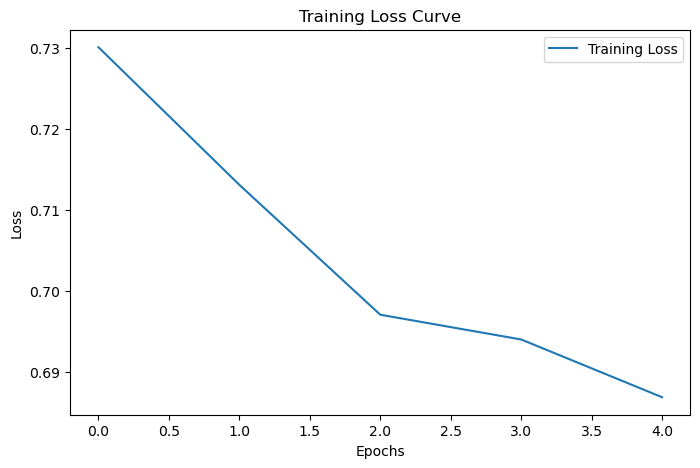

✅ Training complete. Loss curve displayed.


In [15]:
# =============================================
# QUESTION 4 — TRAIN AND EVALUATE A KERAS-BASED CLASSIFIER
# =============================================

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# ------------------------------------------------------------
# TASK 1: Walk through dataset_path to create list of all image files
# ------------------------------------------------------------
dataset_path = '../images_dataSAT'    # adjust if notebook at project root

file_list = []
for root, dirs, files in os.walk(dataset_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_list.append(os.path.join(root, f))
print("✅ Total image files found:", len(file_list))

# ------------------------------------------------------------
# TASK 2: Create generator (no validation split due to small dataset)
# ------------------------------------------------------------
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=2,
    class_mode='categorical'
)

print("Training samples:", train_generator.samples)

# ------------------------------------------------------------
# TASK 3 & 4: Build and compile CNN (4 Conv2D + 5 Dense)
# ------------------------------------------------------------
def build_cnn():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),

        # 4 Conv2D layers
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),

        # 5 Dense layers (4 hidden + 1 output)
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    return model

model = build_cnn()
print("✅ CNN model built successfully.")
print("Total layers in model:", len(model.layers))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("✅ Model compiled.")

# ------------------------------------------------------------
# TASK 5: Define a checkpoint callback
# ------------------------------------------------------------
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
print("✅ Checkpoint callback ready (monitors accuracy).")

# ------------------------------------------------------------
# TRAIN MODEL
# ------------------------------------------------------------
history = model.fit(
    train_generator,
    epochs=5,
    verbose=1,
    callbacks=[checkpoint]
)

# ------------------------------------------------------------
# TASK 6: Plot training loss
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("✅ Training complete. Loss curve displayed.")
